In [1]:
#basic
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

The task is ** to choose exactly 53,979 users ** (user_id, *5% of all users in the dataset*) and **for each select ﬁve third-level product categories (id3)** that they **have not viewed in the last three weeks** and which will be of interest to them in **the next seven days**.<br> The resulting score is based on the number of users for which at least one product category is correctly nominated. Accurate predictions of two or more categories for one user will not improve your score. 
<img src="statement-image.png"><br>
The metric implementation in Python can be found [here](https://github.com/DmitryUlyanov/IDAO/blob/master/scorer.py). 

In [2]:
def scorer(y_true, y_pred, num_users=1079572):
    '''
        `y_true` and `y_pred` are dictionaries of type {user: items_list}
        
        `num_users` is the number of users in training set. 
        The scorer expects predictions for exactly `ceil(num_users*0.05)` users
        
        For private and public leaderboard evaluation:
            - for the track one scorer `num_users` is equal to 1079572
            - for the track two `num_users=100000`
    '''
    
    num_users_5p = np.ceil(0.05 * num_users)
    
    # Check everything is correct
    assert type(y_true) == type(y_pred) == dict, 'Need `y_pred` and `y_true` to be dictionaries.'
    assert len(y_pred) == num_users_5p, 'Found predictions for %d users, instead of %d.' % (len(y_pred), num_users_5p)
    assert np.all([len(x) == 5 for x in y_pred.values()]), 'Please, submit exactly 5 items per user.'
    
    # Compute score
    score = 0
    for user, items_pred in y_pred.items():
        items_true = y_true.get(user, [])
        score += len(set(items_true) & set(items_pred)) > 0

    return score / float(len(y_pred)) * 10000.0


You will be working with **Yandex.Market** search logs. 
Each row in the data corresponds to a **"view"** event:* a particular user viewed an item that belongs to a particular category.*

The data is stored in a .csv ﬁle with the following ﬁelds:

*    **user_id** — individual shopper identiﬁer
*    **date** — the day when user’s interest in a particular product was recorded; *from 1 to 54*
*    **id1** — ﬁrst (highest) level category identiﬁer, e.g. “Home appliances”.
*    **id2** — second (middle) level category identiﬁer, e.g. “Kitchen appliances”.
*    **id3** — third (lowest) level category identiﬁer, e.g. “Refrigerators”.


In [3]:
train = pd.read_csv('train.csv.zip')

In [4]:
train.head()

,id3,user_id,id2,date,id1
0,714,464300,34,1,4
1,714,915655,34,1,4
2,316,262696,42,1,2
3,52,354280,4,1,10
4,581,218912,14,1,10


In [6]:
train.dtypes

id3        int64
user_id    int64
id2        int64
date       int64
id1        int64
dtype: object

In [54]:
test = train[:53979]

## Output format
Please upload your predictions into the system in the .csv format. The ﬁle should consist of 53,979 + 1 rows and contain columns ** user_id, id3_1, id3_2, id3_3, id3_4, id3_5**.

In [53]:
train.isnull().sum()

id3        0
user_id    0
id2        0
date       0
id1        0
dtype: int64

In [31]:
import seaborn as sns

Text(0.5,0,'ids')

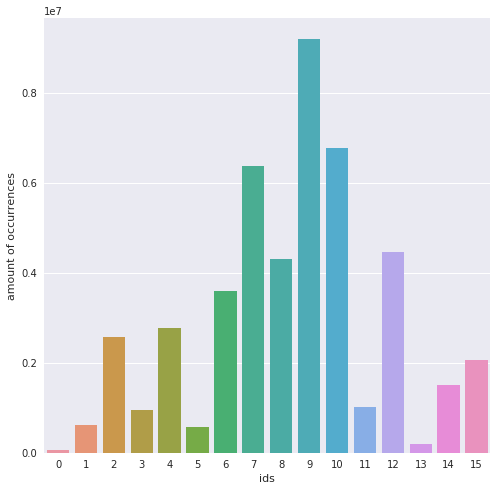

In [47]:
plt.figure(figsize=(8, 8))
sns.set(style="darkgrid")
x = train.id1.unique()
x.sort()
ax = sns.barplot(x=x, y=train.id1.value_counts(sort=False))
ax.set_ylabel('amount of occurrences')
ax.set_xlabel('ids')

Text(0.5,0,'ids')

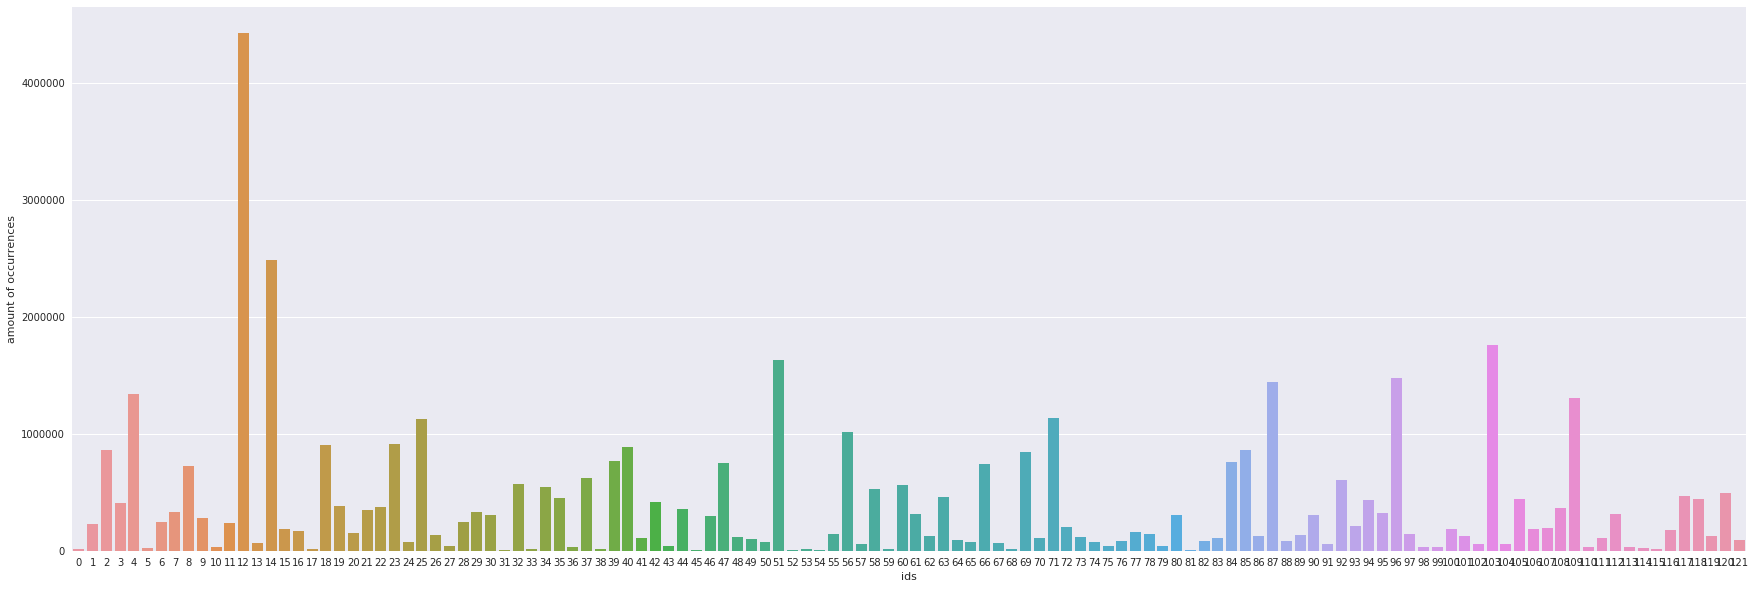

In [51]:
plt.figure(figsize=(30, 10))
sns.set(style="darkgrid")
x = train.id2.unique()
x.sort()
ax = sns.barplot(x=x, y=train.id2.value_counts(sort=False))
ax.set_ylabel('amount of occurrences')
ax.set_xlabel('ids')